TSP Tour (Greedy Approach): [0, 1, 3, 2, 0]
Total Distance: 80


Text(0.5, 1.0, 'TSP Tour (Greedy Approach)')

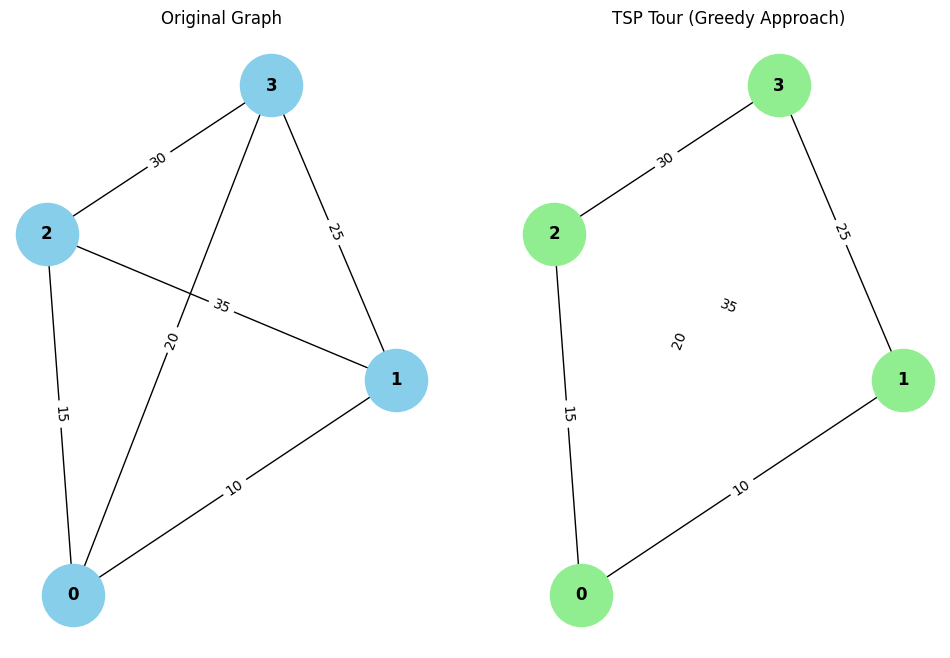

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import sys

def tsp_greedy(graph):
    n = len(graph)
    visited = [False] * n
    path = []
    total_distance = 0
    
    current_city = 0
    path.append(current_city)
    visited[current_city] = True
    
    for _ in range(n - 1):
        min_distance = sys.maxsize
        nearest_city = None
        
        for neighbor, distances in graph[current_city].items():
            distance = distances['weight']
            if not visited[neighbor] and distance < min_distance:
                min_distance = distance
                nearest_city = neighbor
        
        current_city = nearest_city
        path.append(current_city)
        visited[current_city] = True
        total_distance += min_distance
    
    total_distance += graph[path[-1]][path[0]]['weight']
    path.append(path[0])
    
    return path, total_distance

G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3])
G.add_weighted_edges_from([(0, 1, 10), (0, 2, 15), (0, 3, 20), (1, 2, 35), (1, 3, 25), (2, 3, 30)])
graph_dict = nx.to_dict_of_dicts(G)

plt.figure(figsize=(12, 8))
plt.subplot(121)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=12, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.title('Original Graph')

path, total_distance = tsp_greedy(graph_dict)
print("TSP Tour (Greedy Approach):", path)
print("Total Distance:", total_distance)

tsp_tour_graph = nx.Graph()
tsp_tour_graph.add_nodes_from(G.nodes())
for i in range(len(path) - 1):
    tsp_tour_graph.add_edge(path[i], path[i + 1])

plt.subplot(122)
nx.draw(tsp_tour_graph, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(tsp_tour_graph, pos=pos, edge_labels=edge_labels)
plt.title('TSP Tour (Greedy Approach)')

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3])
G.add_weighted_edges_from([(0, 1, 10), (0, 2, 15), (0, 3, 20), (1, 2, 35), (1, 3, 25), (2, 3, 30)])

# Solve the TSP using NetworkX's built-in function
tsp_path = nx.approximation.traveling_salesman_problem(G, cycle=False)

travel_cost = sum(G[tsp_path[i]][tsp_path[i+1]]['weight'] for i in range(len(tsp_path) - 1))
travel_cost += G[tsp_path[-1]][tsp_path[0]]['weight']

# Print the TSP path
print("TSP Path:", tsp_path)
print("Total Distance:", travel_cost)


TSP Path: [3, 1, 0, 2]
Total Distance: 80
